## Library Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Data Load

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
test = pd.read_csv('data/test.csv')

## 평가지표 설정

In [4]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred)/true)
    return score

In [5]:
def MAE(true, pred):
    score = np.mean(np.abs(true-pred))
    return score

## DATA EDA

<AxesSubplot:>

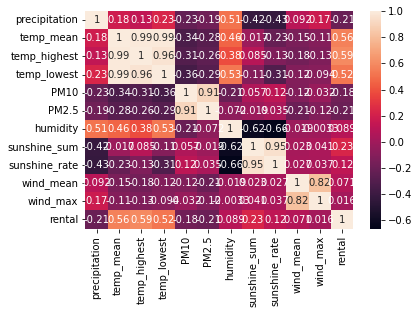

In [124]:
sns.heatmap(train.corr(),annot=True)

## 결측치 처리 Part(강수량, 일조량)

In [6]:
def fill_na_rain_sun(data):
    data['precipitation']=data['precipitation'].fillna(0) # 강수량 결측치는 모두 0으로 채워줌
    data['sunshine_sum']=data['sunshine_sum'].fillna(data['sunshine_sum'].mean()) #sunshine_sum의 결측치는 평균값으로 채워줌    
    print(data.isnull().sum())    
    return data    

In [7]:
train = fill_na_rain_sun(train)
test = fill_na_rain_sun(test)

date              0
precipitation     0
temp_mean         0
temp_highest      0
temp_lowest       0
PM10             67
PM2.5            68
humidity          0
sunshine_sum      0
sunshine_rate     0
wind_mean         0
wind_max          0
rental            0
dtype: int64
date             0
precipitation    0
temp_mean        0
temp_highest     0
temp_lowest      0
PM10             0
PM2.5            0
humidity         0
sunshine_sum     0
sunshine_rate    0
wind_mean        0
wind_max         0
dtype: int64


## 결측치 처리 Part2 (미세먼지, 초미세먼지)
 1. 다중대체 기법 사용
 2. Spline 기법 사용(비교용)

In [8]:
# date column drop

train = train.drop('date', axis = 1)
test = test.drop('date', axis = 1)

### 다중대체 기법

In [9]:
col_name = train.columns.to_list()

In [10]:
train_multimp = pd.DataFrame(IterativeImputer(random_state=42).fit_transform(train))

In [11]:
train_multimp.columns = col_name

In [12]:
train_multimp

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950.0
1,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136.0
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156.0
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102.0
4,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103.0
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912.0
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747.0
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488.0


In [13]:
# target 설정

train_multimp_copy = train_multimp.copy()
X_train_multimp = train_multimp_copy.iloc[:, 0:-1]
y_train_multimp = train_multimp_copy.iloc[:,-1]

In [14]:
X_train_multimp

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max
0,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8
1,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5
4,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6
...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2


In [15]:
y_train_multimp

0        4950.0
1        7136.0
2        7156.0
3        7102.0
4        7705.0
         ...   
1090    37103.0
1091    46912.0
1092    35747.0
1093    22488.0
1094    24535.0
Name: rental, Length: 1095, dtype: float64

### Spline 기법

In [16]:
ip_spline = train[['PM10','PM2.5']].interpolate(method='spline', order = 4)

In [17]:
def fill_na(data, method):
    data[['PM10', 'PM2.5']] = method
    print(data.isnull().sum())    
    return data    

In [18]:
spline_train = train.copy()
spline_train = fill_na(spline_train, ip_spline)

precipitation    0
temp_mean        0
temp_highest     0
temp_lowest      0
PM10             0
PM2.5            0
humidity         0
sunshine_sum     0
sunshine_rate    0
wind_mean        0
wind_max         0
rental           0
dtype: int64


In [19]:
#target 설정

spline_train_copy = spline_train.copy()
X_train_spline = spline_train.iloc[:,0:-1]
y_train_spline = spline_train.iloc[:, -1]

In [20]:
X_train_spline

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max
0,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8
1,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5
4,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6
...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2


In [21]:
y_train_spline

0        4950
1        7136
2        7156
3        7102
4        7705
        ...  
1090    37103
1091    46912
1092    35747
1093    22488
1094    24535
Name: rental, Length: 1095, dtype: int64

## 모델 구현 및 학습

1. LinearRegression
2. CatBoost
3. gbr
4. lightgbm
5. rf
6. xgboost

### LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [23]:
def training_model(model, x, y):    
    model.fit(x, y)         
    return model


def training_model_score(model, x, y):
    y_pred = model.predict(x)        
    nmae_score = NMAE(y,y_pred)    
    return nmae_score

In [24]:
# model 선언
lr_mul = LinearRegression()
lr_spline = LinearRegression()

# model 학습
lr_mul_model = training_model(lr_mul, X_train_multimp, y_train_multimp)
lr_spline_model = training_model(lr_spline, X_train_spline, y_train_spline)

lr_mul_model_score = training_model_score(lr_mul_model, X_train_multimp, y_train_multimp)
lr_spline_model_score = training_model_score(lr_spline_model, X_train_spline, y_train_spline)

In [25]:
print(f"다중대체 : {lr_mul_model_score}")
print(f"Spline : {lr_spline_model_score} ")

다중대체 : 0.6378500259691546
Spline : 0.6353062715556984 


### RandomForest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
X_train = X_train_multimp.copy()
X_train = X_train.drop(['temp_highest', 'temp_lowest'], axis=1)
X_train

,precipitation,temp_mean,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max
0,0.0,-1.3,34.0,17.0,39.1,8.3,86.5,1.4,3.8
1,0.0,-1.8,36.0,22.0,42.0,7.9,82.3,1.8,4.9
2,0.0,-4.7,31.0,19.0,42.3,8.6,88.7,2.2,3.5
3,0.0,-4.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5
4,0.0,-3.0,51.0,35.0,48.4,8.2,84.5,1.7,3.6
...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,70.0,42.0,62.9,5.9,61.5,1.8,2.8
1091,1.3,6.7,66.0,44.0,72.1,8.0,83.3,1.4,3.1
1092,0.2,0.1,69.0,46.0,70.8,0.0,0.0,2.9,6.1
1093,0.0,-10.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2


In [129]:
rf_mul = RandomForestRegressor()
rf_spline = RandomForestRegressor()


# model 학습
rf_mul_model = training_model(rf_mul, X_train, y_train_multimp)
rf_spline_model = training_model(rf_spline, X_train_spline, y_train_spline)

rf_mul_model_score = training_model_score(rf_mul_model, X_train, y_train_multimp)
rf_spline_model_score = training_model_score(rf_spline_model, X_train_spline, y_train_spline)

In [130]:
print(f"다중대체 : {rf_mul_model_score}")
print(f"Spline : {rf_spline_model_score} ")

다중대체 : 0.1732739203256506
Spline : 0.17157851018313672 


### CatBoost 

In [29]:
from catboost import CatBoostRegressor

In [30]:
cb_mul = CatBoostRegressor()
cb_spline = CatBoostRegressor()

cb_mul_model = training_model(cb_mul, X_train_multimp, y_train_multimp)
cb_spline_model = training_model(cb_spline, X_train_spline, y_train_spline)

cb_mul_model_score = training_model_score(cb_mul_model, X_train_multimp, y_train_multimp)
cb_spline_model_score = training_model_score(cb_spline_model, X_train_spline, y_train_spline)

Learning rate set to 0.041534
0:	learn: 29316.2381535	total: 142ms	remaining: 2m 21s
1:	learn: 28751.0472706	total: 143ms	remaining: 1m 11s
2:	learn: 28179.0893326	total: 144ms	remaining: 48s
3:	learn: 27707.3498973	total: 146ms	remaining: 36.3s
4:	learn: 27226.8744495	total: 147ms	remaining: 29.3s
5:	learn: 26753.9997108	total: 148ms	remaining: 24.5s
6:	learn: 26284.7115190	total: 149ms	remaining: 21.2s
7:	learn: 25786.8741034	total: 151ms	remaining: 18.7s
8:	learn: 25364.2109799	total: 152ms	remaining: 16.7s
9:	learn: 24942.4634447	total: 153ms	remaining: 15.1s
10:	learn: 24545.3763209	total: 154ms	remaining: 13.8s
11:	learn: 24229.5788866	total: 155ms	remaining: 12.8s
12:	learn: 23918.8956309	total: 156ms	remaining: 11.9s
13:	learn: 23572.2314742	total: 157ms	remaining: 11.1s
14:	learn: 23243.4242619	total: 158ms	remaining: 10.4s
15:	learn: 22954.2313131	total: 159ms	remaining: 9.79s
16:	learn: 22687.3906233	total: 160ms	remaining: 9.26s
17:	learn: 22426.7658061	total: 161ms	remaini

229:	learn: 12634.7101350	total: 347ms	remaining: 1.16s
230:	learn: 12610.5347559	total: 348ms	remaining: 1.16s
231:	learn: 12595.4766621	total: 349ms	remaining: 1.16s
232:	learn: 12577.4429142	total: 350ms	remaining: 1.15s
233:	learn: 12555.9082089	total: 351ms	remaining: 1.15s
234:	learn: 12547.1752733	total: 352ms	remaining: 1.15s
235:	learn: 12536.3057519	total: 353ms	remaining: 1.14s
236:	learn: 12522.9630704	total: 354ms	remaining: 1.14s
237:	learn: 12498.0821411	total: 355ms	remaining: 1.14s
238:	learn: 12482.8254997	total: 356ms	remaining: 1.13s
239:	learn: 12468.9506656	total: 357ms	remaining: 1.13s
240:	learn: 12438.2800489	total: 357ms	remaining: 1.13s
241:	learn: 12424.1623838	total: 358ms	remaining: 1.12s
242:	learn: 12407.7306933	total: 359ms	remaining: 1.12s
243:	learn: 12397.2678036	total: 360ms	remaining: 1.11s
244:	learn: 12383.1498938	total: 361ms	remaining: 1.11s
245:	learn: 12364.0245154	total: 362ms	remaining: 1.11s
246:	learn: 12352.0141741	total: 363ms	remaining

422:	learn: 10085.8395128	total: 515ms	remaining: 702ms
423:	learn: 10068.9661756	total: 516ms	remaining: 701ms
424:	learn: 10062.5848646	total: 517ms	remaining: 699ms
425:	learn: 10057.8873766	total: 518ms	remaining: 698ms
426:	learn: 10043.6154755	total: 519ms	remaining: 696ms
427:	learn: 10035.3676144	total: 520ms	remaining: 694ms
428:	learn: 10024.5128089	total: 521ms	remaining: 693ms
429:	learn: 10017.6613334	total: 521ms	remaining: 691ms
430:	learn: 10001.0501682	total: 522ms	remaining: 690ms
431:	learn: 9999.6917125	total: 523ms	remaining: 688ms
432:	learn: 9986.0208937	total: 524ms	remaining: 687ms
433:	learn: 9976.3240278	total: 525ms	remaining: 685ms
434:	learn: 9970.9772794	total: 526ms	remaining: 683ms
435:	learn: 9967.8965884	total: 527ms	remaining: 682ms
436:	learn: 9963.1133414	total: 528ms	remaining: 680ms
437:	learn: 9948.5020334	total: 529ms	remaining: 679ms
438:	learn: 9935.1526197	total: 530ms	remaining: 677ms
439:	learn: 9933.8576577	total: 531ms	remaining: 675ms
4

611:	learn: 8394.9489878	total: 684ms	remaining: 434ms
612:	learn: 8384.2582253	total: 685ms	remaining: 432ms
613:	learn: 8373.5561656	total: 686ms	remaining: 431ms
614:	learn: 8361.5369939	total: 687ms	remaining: 430ms
615:	learn: 8356.8133210	total: 688ms	remaining: 429ms
616:	learn: 8346.0473829	total: 688ms	remaining: 427ms
617:	learn: 8339.9939866	total: 689ms	remaining: 426ms
618:	learn: 8330.4838461	total: 690ms	remaining: 425ms
619:	learn: 8318.8629140	total: 691ms	remaining: 424ms
620:	learn: 8314.1000085	total: 692ms	remaining: 423ms
621:	learn: 8309.4968137	total: 694ms	remaining: 421ms
622:	learn: 8304.3525391	total: 694ms	remaining: 420ms
623:	learn: 8296.1730756	total: 695ms	remaining: 419ms
624:	learn: 8286.0297593	total: 696ms	remaining: 418ms
625:	learn: 8279.3936316	total: 697ms	remaining: 416ms
626:	learn: 8268.6995409	total: 698ms	remaining: 415ms
627:	learn: 8267.5309434	total: 699ms	remaining: 414ms
628:	learn: 8260.1054376	total: 700ms	remaining: 413ms
629:	learn

806:	learn: 7079.7420511	total: 853ms	remaining: 204ms
807:	learn: 7076.2681848	total: 854ms	remaining: 203ms
808:	learn: 7073.5263582	total: 855ms	remaining: 202ms
809:	learn: 7066.6433899	total: 856ms	remaining: 201ms
810:	learn: 7062.1943363	total: 856ms	remaining: 200ms
811:	learn: 7058.8204050	total: 857ms	remaining: 198ms
812:	learn: 7053.2870051	total: 858ms	remaining: 197ms
813:	learn: 7043.5495673	total: 859ms	remaining: 196ms
814:	learn: 7042.9756577	total: 860ms	remaining: 195ms
815:	learn: 7036.5452960	total: 861ms	remaining: 194ms
816:	learn: 7034.0588457	total: 862ms	remaining: 193ms
817:	learn: 7030.9087193	total: 863ms	remaining: 192ms
818:	learn: 7025.3806395	total: 864ms	remaining: 191ms
819:	learn: 7018.3549728	total: 865ms	remaining: 190ms
820:	learn: 7012.8291695	total: 866ms	remaining: 189ms
821:	learn: 7006.5031449	total: 866ms	remaining: 188ms
822:	learn: 7002.6597692	total: 867ms	remaining: 187ms
823:	learn: 6998.9844008	total: 868ms	remaining: 185ms
824:	learn

998:	learn: 6191.2811926	total: 1.02s	remaining: 1.02ms
999:	learn: 6190.4134166	total: 1.02s	remaining: 0us
Learning rate set to 0.041534
0:	learn: 29316.2381535	total: 31.4ms	remaining: 31.4s
1:	learn: 28751.0472706	total: 32.3ms	remaining: 16.1s
2:	learn: 28187.8436244	total: 33.2ms	remaining: 11s
3:	learn: 27713.0606449	total: 34ms	remaining: 8.47s
4:	learn: 27234.0249676	total: 34.8ms	remaining: 6.93s
5:	learn: 26765.0301283	total: 35.7ms	remaining: 5.92s
6:	learn: 26296.2393908	total: 36.9ms	remaining: 5.23s
7:	learn: 25815.3594319	total: 37.7ms	remaining: 4.68s
8:	learn: 25385.1175444	total: 38.6ms	remaining: 4.25s
9:	learn: 24969.9197143	total: 39.4ms	remaining: 3.9s
10:	learn: 24578.3958226	total: 40.3ms	remaining: 3.62s
11:	learn: 24242.3635632	total: 41.1ms	remaining: 3.39s
12:	learn: 23902.1587375	total: 42ms	remaining: 3.19s
13:	learn: 23562.7693061	total: 43ms	remaining: 3.03s
14:	learn: 23244.4263429	total: 44ms	remaining: 2.89s
15:	learn: 22955.6025624	total: 44.9ms	rem

328:	learn: 11745.3820358	total: 312ms	remaining: 636ms
329:	learn: 11731.8994584	total: 313ms	remaining: 636ms
330:	learn: 11723.6588608	total: 314ms	remaining: 635ms
331:	learn: 11708.3911153	total: 315ms	remaining: 634ms
332:	learn: 11692.3023966	total: 316ms	remaining: 633ms
333:	learn: 11675.6035414	total: 317ms	remaining: 632ms
334:	learn: 11662.9831648	total: 318ms	remaining: 631ms
335:	learn: 11650.3575851	total: 318ms	remaining: 629ms
336:	learn: 11637.8460362	total: 319ms	remaining: 628ms
337:	learn: 11619.2939351	total: 320ms	remaining: 627ms
338:	learn: 11603.9363919	total: 321ms	remaining: 627ms
339:	learn: 11589.8431240	total: 322ms	remaining: 625ms
340:	learn: 11575.0872830	total: 323ms	remaining: 624ms
341:	learn: 11565.9674980	total: 324ms	remaining: 623ms
342:	learn: 11557.6661094	total: 325ms	remaining: 622ms
343:	learn: 11541.6252803	total: 326ms	remaining: 621ms
344:	learn: 11531.6739272	total: 326ms	remaining: 620ms
345:	learn: 11515.8464900	total: 327ms	remaining

520:	learn: 9601.4307841	total: 480ms	remaining: 442ms
521:	learn: 9587.6929311	total: 481ms	remaining: 441ms
522:	learn: 9576.6404439	total: 482ms	remaining: 440ms
523:	learn: 9574.4470965	total: 483ms	remaining: 439ms
524:	learn: 9567.0873388	total: 484ms	remaining: 438ms
525:	learn: 9558.2549782	total: 485ms	remaining: 437ms
526:	learn: 9556.5947699	total: 486ms	remaining: 436ms
527:	learn: 9545.6088875	total: 487ms	remaining: 435ms
528:	learn: 9537.5172815	total: 488ms	remaining: 434ms
529:	learn: 9529.7329597	total: 489ms	remaining: 433ms
530:	learn: 9512.7193811	total: 490ms	remaining: 432ms
531:	learn: 9504.2774052	total: 490ms	remaining: 431ms
532:	learn: 9497.4240158	total: 491ms	remaining: 430ms
533:	learn: 9487.6976598	total: 492ms	remaining: 429ms
534:	learn: 9481.3056105	total: 493ms	remaining: 428ms
535:	learn: 9471.8580498	total: 494ms	remaining: 428ms
536:	learn: 9459.2159907	total: 495ms	remaining: 427ms
537:	learn: 9448.7994627	total: 496ms	remaining: 426ms
538:	learn

715:	learn: 8023.9963944	total: 647ms	remaining: 257ms
716:	learn: 8015.1212643	total: 648ms	remaining: 256ms
717:	learn: 8005.7232820	total: 649ms	remaining: 255ms
718:	learn: 7999.9999300	total: 650ms	remaining: 254ms
719:	learn: 7992.3533956	total: 651ms	remaining: 253ms
720:	learn: 7988.3498627	total: 652ms	remaining: 252ms
721:	learn: 7980.8271766	total: 653ms	remaining: 251ms
722:	learn: 7971.9500670	total: 654ms	remaining: 250ms
723:	learn: 7966.3175880	total: 654ms	remaining: 249ms
724:	learn: 7962.0040318	total: 656ms	remaining: 249ms
725:	learn: 7952.0492448	total: 656ms	remaining: 248ms
726:	learn: 7951.0124902	total: 657ms	remaining: 247ms
727:	learn: 7943.6454218	total: 658ms	remaining: 246ms
728:	learn: 7937.4995835	total: 659ms	remaining: 245ms
729:	learn: 7936.9518219	total: 660ms	remaining: 244ms
730:	learn: 7926.3608978	total: 661ms	remaining: 243ms
731:	learn: 7916.6759248	total: 662ms	remaining: 242ms
732:	learn: 7915.8013120	total: 662ms	remaining: 241ms
733:	learn

896:	learn: 7082.7780501	total: 817ms	remaining: 93.8ms
897:	learn: 7079.0051679	total: 818ms	remaining: 92.9ms
898:	learn: 7077.6313895	total: 819ms	remaining: 92ms
899:	learn: 7076.7034814	total: 820ms	remaining: 91.1ms
900:	learn: 7076.0229443	total: 821ms	remaining: 90.2ms
901:	learn: 7075.8594330	total: 821ms	remaining: 89.3ms
902:	learn: 7065.2367215	total: 822ms	remaining: 88.3ms
903:	learn: 7057.0976853	total: 823ms	remaining: 87.4ms
904:	learn: 7047.6476232	total: 824ms	remaining: 86.5ms
905:	learn: 7044.0789840	total: 825ms	remaining: 85.6ms
906:	learn: 7039.2956787	total: 826ms	remaining: 84.7ms
907:	learn: 7034.8668536	total: 827ms	remaining: 83.8ms
908:	learn: 7027.2505553	total: 828ms	remaining: 82.9ms
909:	learn: 7024.0813634	total: 829ms	remaining: 81.9ms
910:	learn: 7019.4204227	total: 830ms	remaining: 81.1ms
911:	learn: 7014.8467122	total: 831ms	remaining: 80.2ms
912:	learn: 7009.5601938	total: 832ms	remaining: 79.2ms
913:	learn: 7003.3157275	total: 832ms	remaining: 7

In [31]:
print(f"다중대체 : {cb_mul_model_score}")
print(f"Spline : {cb_spline_model_score} ")

다중대체 : 0.17362835305221483
Spline : 0.185972786363905 


### XGBoost

In [32]:
from xgboost import XGBRegressor

In [131]:
xgb_mul = XGBRegressor()
xgb_spline = XGBRegressor()

# model 학습
xgb_mul_model = training_model(xgb_mul, X_train, y_train_multimp)
xgb_spline_model = training_model(xgb_spline, X_train_spline, y_train_spline)

xgb_mul_model_score = training_model_score(xgb_mul_model, X_train, y_train_multimp)
xgb_spline_model_score = training_model_score(xgb_spline_model, X_train_spline, y_train_spline)

In [132]:
print(f"다중대체 : {xgb_mul_model_score}")
print(f"Spline : {xgb_spline_model_score} ")

다중대체 : 0.028495826661066224
Spline : 0.027195866146302792 


과적합 해결 필요(XGB)

### LightGBM

In [35]:
from lightgbm import LGBMRegressor

In [36]:
lgb_mul = LGBMRegressor()
lgb_spline = LGBMRegressor()

# model 학습
lgb_mul_model = training_model(lgb_mul, X_train_multimp, y_train_multimp)
lgb_spline_model = training_model(lgb_spline, X_train_spline, y_train_spline)

lgb_mul_model_score = training_model_score(lgb_mul_model, X_train_multimp, y_train_multimp)
lgb_spline_model_score = training_model_score(lgb_spline_model, X_train_spline, y_train_spline)

In [37]:
print(f"다중대체 : {lgb_mul_model_score}")
print(f"Spline : {lgb_spline_model_score} ")

다중대체 : 0.16503269592586162
Spline : 0.1763373115104504 


## Fine tuning

가장 결과가 좋았던 두개의 모델로 hyper parmeter tuning 진행

### Random Forest (GridSearchCV)

In [82]:
# 필요 Library import

from sklearn.model_selection import GridSearchCV

In [95]:
rf = RandomForestRegressor()

rf_dists = {
    'n_estimators' : [100,150,200],
    'max_depth' : [7,9,11,15,25]    
}

rf_cv = GridSearchCV(rf,
                     param_grid=rf_dists,
                     cv = 5,
                     scoring='r2',
                    )

rf_cv.fit(X_train_spline, y_train_spline)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7, 9, 11, 15, 25],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [97]:
rf_cv.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [98]:
training_model_score(rf_cv.best_estimator_, X_train_spline, y_train_spline)

0.17946882145752185

### XGBoost(GridSearchCV) 

In [108]:
xgb = XGBRegressor()

xgb_dists = {
    'max_depth' : [5,10,15],
    'n_estimators' : [30,50,70],
    'learning_rate': [0.01,0.1],
    'random_state' : [42]
}

xgb_cv = GridSearchCV(xgb, 
                     param_grid = xgb_dists,
                     cv=5,
                     scoring='neg_mean_absolute_error'
                     )

xgb_cv.fit(X_train_multimp, y_train_multimp)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [109]:
xgb_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [110]:
training_model_score(xgb_cv.best_estimator_, X_train_multimp, y_train_multimp)

0.27433932929604127

## 제출 파일

In [113]:
submission = pd.read_csv('data/sample_submission.csv', index_col=0)

In [114]:
def submission_file(model, model_name, submission, test):
    y_pred = model.predict(test)
    
    submission['rental'] = y_pred
    
    
    submission.to_csv(f'data/{model_name}_submission.csv')
    
    
    
    return submission

In [134]:
# 상관계수 큰 column drop
test_copy = test.copy()
test_copy = test_copy.drop(['temp_highest', 'temp_lowest'], axis =1)
test_copy

,precipitation,temp_mean,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max
0,0.0,-4.2,30.0,17.0,64.0,6.5,67.7,2.0,4.1
1,0.0,-5.0,34.0,12.0,38.5,9.0,93.8,2.6,5.4
2,0.0,-5.6,39.0,14.0,45.0,5.5,56.7,2.0,4.5
3,0.0,-3.5,40.0,23.0,51.4,4.6,47.4,1.7,3.2
4,0.0,-5.5,30.0,17.0,52.8,8.6,88.7,2.9,5.7
...,...,...,...,...,...,...,...,...,...
360,0.0,-7.6,33.0,20.0,60.9,3.8,39.6,1.7,3.1
361,0.0,-4.1,51.0,38.0,73.8,1.7,17.7,2.2,3.1
362,0.2,0.4,66.0,49.0,72.9,1.8,18.8,2.6,5.9
363,0.0,-3.9,30.0,17.0,48.5,7.3,76.0,3.3,6.6


In [135]:
submission_file(xgb_mul_model, "xgb_model", submission, test_copy)

,rental
date,
2021-01-01,30792.933594
2021-01-02,28757.335938
2021-01-03,19288.095703
2021-01-04,19228.611328
2021-01-05,14975.884766
...,...
2021-12-27,16137.746094
2021-12-28,14732.487305
2021-12-29,27732.849609
